In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# explore the dataset

In [12]:
train_images.shape

(60000, 28, 28)

In [15]:
len(train_labels)

60000

In [17]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [18]:
# Preprocess the data

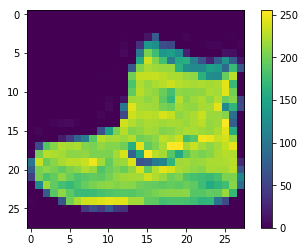

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way

In [27]:
train_images = train_images / 255
test_images = test_images / 255

Display the first 25 images from the training set and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

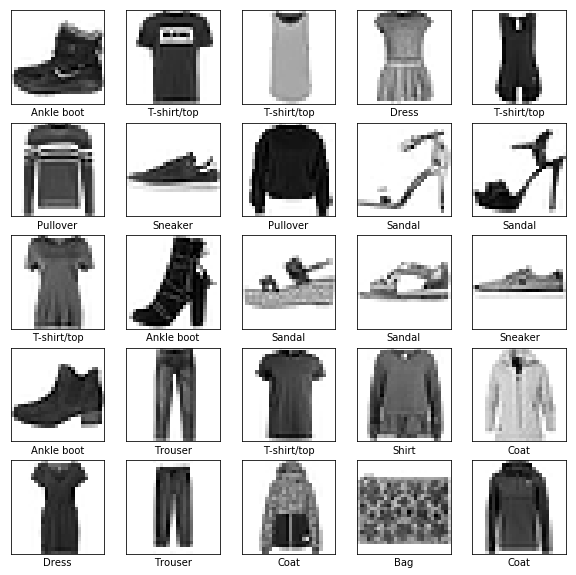

In [44]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4930 - acc: 0.8268
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3704 - acc: 0.8674
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3359 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.3135 - acc: 0.8846
Epoch 5/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2960 - acc: 0.8906


In [48]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.3607 - acc: 0.8726
Test accuracy: 0.8726


In [49]:
predictions = model.predict(test_images)

In [50]:
predictions[0]

array([7.7105096e-07, 1.6138203e-07, 2.2861275e-07, 1.3615719e-08,
       6.1683431e-07, 1.4074469e-03, 1.2996288e-06, 8.2794633e-03,
       1.0524534e-06, 9.9030894e-01], dtype=float32)

In [51]:
np.argmax(predictions[0])

9

In [52]:
class_names[9]

'Ankle boot'

In [53]:
test_labels[0]

9

In [54]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

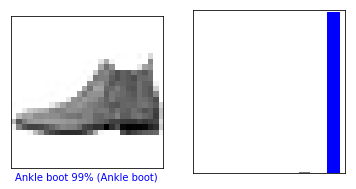

In [55]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

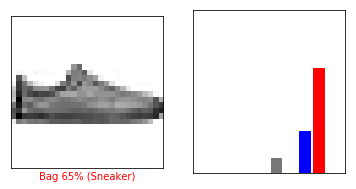

In [56]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

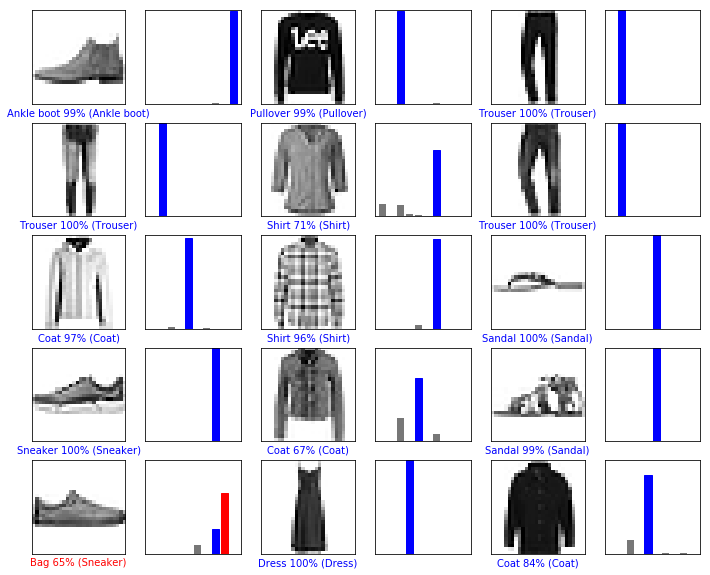

In [57]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [58]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [59]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [60]:
predictions_single = model.predict(img)

print(predictions_single)

[[7.71049542e-07 1.61382033e-07 2.28612322e-07 1.36156935e-08
  6.16833120e-07 1.40744494e-03 1.29962632e-06 8.27945862e-03
  1.05244942e-06 9.90308940e-01]]


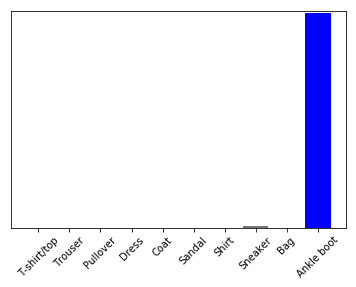

In [61]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [62]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

9


And, as before, the model predicts a label of 9.